## preparing environnement

###### Importing libraries

In [ ]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

Importing files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



loading csv files

In [3]:
my_df_all_patients = pd.read_csv('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/all_patients_raw_data.csv', sep=",")
my_df_all_patients.drop("Unnamed: 0", axis=1, inplace=True)

setting options for pandas

In [4]:
# Displaying option: all columns
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis (EDA)

Small visualization of the dataset:

In [5]:
print("\n\n10 first rows: \n")
my_df_all_patients.head(n=10)



10 first rows: 



,intubated,vent,dialysis,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,ph,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,gender,age,thrombolytics,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,BMI,hospital_death,sepsis,ethnicity
0,0,0,0,14.7,36.1,30.0,140.0,139.0,62.0,NaN,40.1,2.30,3.1,NaN,NaN,95.0,4.1,15.0,1.0,70.0,0,0,0,0,0,0,0,0,36.295906,1,0,Caucasian
1,0,0,0,NaN,36.4,16.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.0,0,0,0,0,0,0,0,0,20.575852,0,0,Caucasian
2,0,0,0,14.1,39.3,36.0,118.0,134.0,40.0,NaN,27.4,2.51,2.3,NaN,NaN,168.0,0.4,13.0,0.0,68.0,0,0,0,0,0,0,0,0,22.732803,0,1,Caucasian
3,0,0,0,NaN,NaN,25.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.0,71.0,0,0,0,0,0,0,0,0,38.617545,0,1,Caucasian
4,0,1,0,12.7,35.1,33.0,120.0,145.0,46.0,7.45,36.9,0.56,NaN,51.0,37.0,145.0,NaN,5.0,1.0,77.0,0,0,0,0,0,0,0,0,27.421875,0,0,Caucasian
5,0,0,0,NaN,36.7,37.0,102.0,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0,25.0,0,0,0,0,0,0,0,0,31.952749,0,0,Caucasian
6,0,1,0,42.7,40.1,54.0,204.0,133.0,198.0,7.46,26.2,1.90,NaN,65.0,23.0,145.0,NaN,13.0,0.0,82.0,0,0,0,0,0,0,0,0,23.914007,0,1,Caucasian
7,0,1,0,NaN,36.4,32.0,57.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.0,NaN,0,0,0,0,0,0,0,0,35.078125,0,0,Caucasian
8,1,1,0,8.0,34.8,4.0,114.0,NaN,60.0,7.39,25.9,NaN,NaN,142.0,30.0,185.0,NaN,15.0,1.0,81.0,0,0,0,0,0,0,0,0,22.635548,0,0,Caucasian
9,0,0,0,4.1,37.2,10.0,114.0,142.0,62.0,NaN,31.0,0.65,NaN,NaN,NaN,121.0,NaN,15.0,0.0,59.0,0,0,0,0,0,0,0,0,28.392932,0,0,Caucasian


shape of the dataset:

In [6]:
my_df_all_patients.shape

(159436, 32)

looking for value count and data type:

In [7]:
my_df_all_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159436 entries, 0 to 159435
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   intubated          159436 non-null  int64  
 1   vent               159436 non-null  int64  
 2   dialysis           159436 non-null  int64  
 3   wbc                119032 non-null  float64
 4   temperature        148412 non-null  float64
 5   respiratoryrate    156640 non-null  float64
 6   heartrate          157368 non-null  float64
 7   sodium             125816 non-null  float64
 8   meanbp             156998 non-null  float64
 9   ph                 35903 non-null   float64
 10  hematocrit         122288 non-null  float64
 11  creatinine         125257 non-null  float64
 12  albumin            62393 non-null   float64
 13  pao2               35903 non-null   float64
 14  pco2               35903 non-null   float64
 15  glucose            138208 non-null  float64
 16  bi

Descriptive statistics:

In [8]:
my_df_all_patients.describe()

,intubated,vent,dialysis,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,ph,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,gender,age,thrombolytics,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,BMI,hospital_death,sepsis
count,159436.000000,159436.000000,159436.000000,119032.000000,148412.000000,156640.000000,157368.000000,125816.000000,156998.000000,35903.000000,122288.000000,125257.000000,62393.000000,35903.000000,35903.000000,138208.000000,56644.000000,154838.000000,159357.000000,153639.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,152616.000000,159436.000000,159436.000000
mean,0.146880,0.237719,0.035858,12.224991,36.426558,25.229114,100.050938,137.964942,86.819738,7.353210,32.719608,1.544333,2.878297,130.700883,42.754621,163.594238,1.194379,13.014512,0.460281,61.875168,0.016734,0.001079,0.015404,0.004378,0.020999,0.007432,0.027127,0.017957,28.913628,0.089817,0.128428
std,0.353988,0.425688,0.185936,8.082717,0.930188,15.005306,30.990472,5.570063,41.671497,0.102147,6.895402,1.728521,0.692871,85.464612,13.320554,102.279607,2.354131,3.415687,0.498421,16.802862,0.128273,0.032828,0.123155,0.066021,0.143381,0.085891,0.162454,0.132796,7.996061,0.285920,0.334566
min,0.000000,0.000000,0.000000,0.010000,20.000000,4.000000,20.000000,91.000000,40.000000,6.531000,6.000000,0.100000,1.000000,9.000000,6.500000,1.000000,0.100000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.078125,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.400000,36.200000,11.000000,87.000000,135.000000,53.000000,7.302000,27.800000,0.710000,2.400000,76.000000,34.600000,97.000000,0.400000,13.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.470015,0.000000,0.000000
50%,0.000000,0.000000,0.000000,10.300000,36.500000,27.000000,104.000000,138.000000,66.000000,7.360000,32.800000,0.990000,2.900000,102.900000,40.500000,135.000000,0.680000,15.000000,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.459684,0.000000,0.000000
75%,0.000000,0.000000,0.000000,15.200000,36.700000,36.000000,120.000000,141.000000,123.000000,7.420000,37.500000,1.590000,3.400000,153.300000,47.800000,199.000000,1.100000,15.000000,1.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.735401,0.000000,0.000000
max,1.000000,1.000000,1.000000,198.100000,42.300000,60.000000,220.000000,195.000000,200.000000,7.810000,72.700000,24.950000,7.400000,636.000000,147.300000,2357.000000,60.200000,15.000000,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000


creating a new dataset for statistical analysis:

In [9]:
stat_df=my_df_all_patients.copy()

## Missing values management:

### Check NaNs

In [10]:
import missingno as msno

displaying missing values matrix:

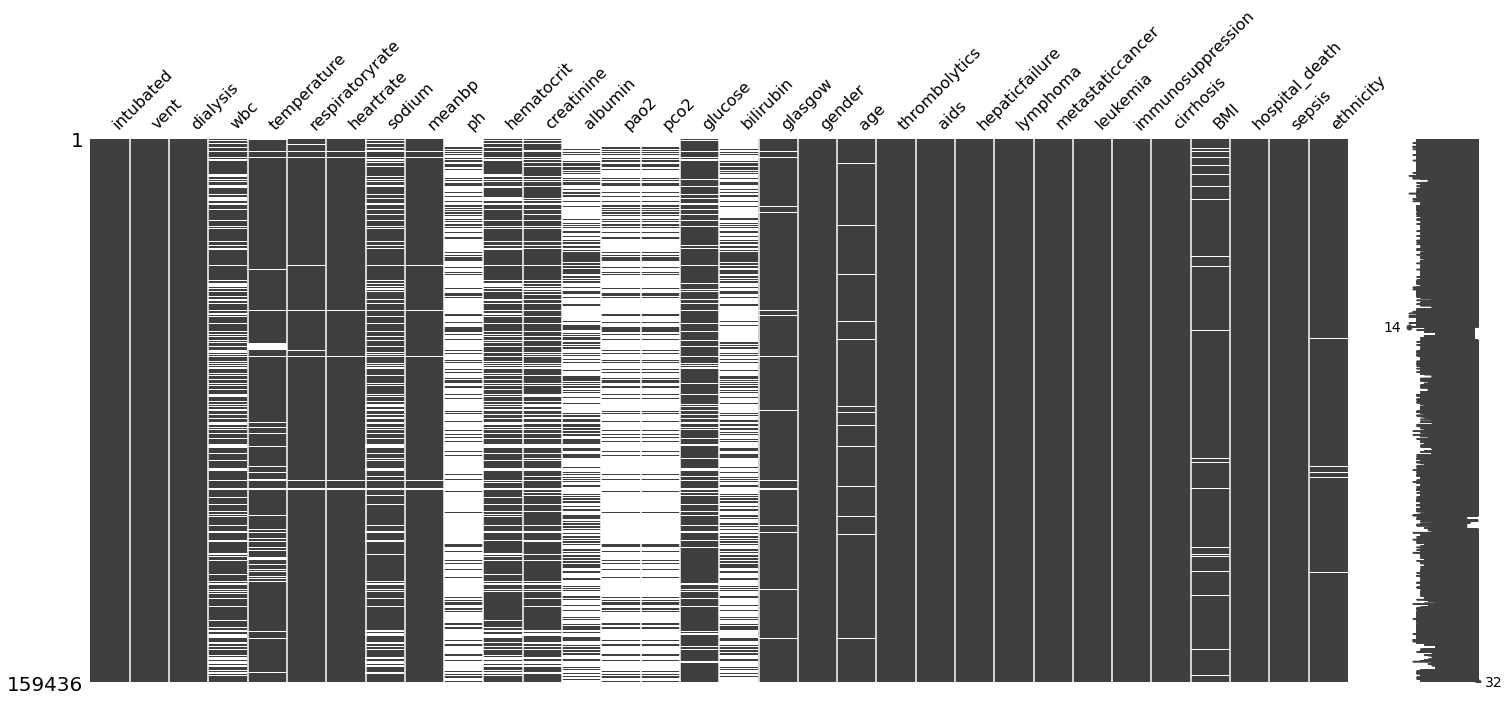

In [11]:
msno.matrix(stat_df)

In [12]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159436 entries, 0 to 159435
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   intubated          159436 non-null  int64  
 1   vent               159436 non-null  int64  
 2   dialysis           159436 non-null  int64  
 3   wbc                119032 non-null  float64
 4   temperature        148412 non-null  float64
 5   respiratoryrate    156640 non-null  float64
 6   heartrate          157368 non-null  float64
 7   sodium             125816 non-null  float64
 8   meanbp             156998 non-null  float64
 9   ph                 35903 non-null   float64
 10  hematocrit         122288 non-null  float64
 11  creatinine         125257 non-null  float64
 12  albumin            62393 non-null   float64
 13  pao2               35903 non-null   float64
 14  pco2               35903 non-null   float64
 15  glucose            138208 non-null  float64
 16  bi

In [13]:
stat_df.isnull().sum()

intubated                 0
vent                      0
dialysis                  0
wbc                   40404
temperature           11024
respiratoryrate        2796
heartrate              2068
sodium                33620
meanbp                 2438
ph                   123533
hematocrit            37148
creatinine            34179
albumin               97043
pao2                 123533
pco2                 123533
glucose               21228
bilirubin            102792
glasgow                4598
gender                   79
age                    5797
thrombolytics             0
aids                      0
hepaticfailure            0
lymphoma                  0
metastaticcancer          0
leukemia                  0
immunosuppression         0
cirrhosis                 0
BMI                    6820
hospital_death            0
sepsis                    0
ethnicity              1944
dtype: int64

### data imputation

#### Random Value imputation method for categorical variables

- NaN imputation helper with Random value imputation Method

In [14]:
# lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=stat_df[feature].dropna().sample(stat_df[feature].isnull().sum())               
    random_sample.index=stat_df[stat_df[feature].isnull()].index
    stat_df.loc[stat_df[feature].isnull(),feature]=random_sample

In [15]:
# Imputation the concerned numerical columns
Random_value_imputation('gender')
Random_value_imputation('ethnicity')
Random_value_imputation('BMI')
#Random_value_imputation('sodium')
#Random_value_imputation('meanbp')
#Random_value_imputation('hematocrit')
#Random_value_imputation('creatinine')
#Random_value_imputation('albumin')
#Random_value_imputation('pao2')
#Random_value_imputation('pco2')
#Random_value_imputation('glucose')
#Random_value_imputation('bilirubin')
#Random_value_imputation('glasgow')
#Random_value_imputation('ethnicity')
#Random_value_imputation('apacheadmissiondx')
#Random_value_imputation('BMI')
#Random_value_imputation('age_bins')
#Random_value_imputation('BMI_Category')

In [16]:
stat_df.isnull().sum()

intubated                 0
vent                      0
dialysis                  0
wbc                   40404
temperature           11024
respiratoryrate        2796
heartrate              2068
sodium                33620
meanbp                 2438
ph                   123533
hematocrit            37148
creatinine            34179
albumin               97043
pao2                 123533
pco2                 123533
glucose               21228
bilirubin            102792
glasgow                4598
gender                    0
age                    5797
thrombolytics             0
aids                      0
hepaticfailure            0
lymphoma                  0
metastaticcancer          0
leukemia                  0
immunosuppression         0
cirrhosis                 0
BMI                       0
hospital_death            0
sepsis                    0
ethnicity                 0
dtype: int64

In [17]:
stat_df.describe()

,intubated,vent,dialysis,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,ph,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,gender,age,thrombolytics,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,BMI,hospital_death,sepsis
count,159436.000000,159436.000000,159436.000000,119032.000000,148412.000000,156640.000000,157368.000000,125816.000000,156998.000000,35903.000000,122288.000000,125257.000000,62393.000000,35903.000000,35903.000000,138208.000000,56644.000000,154838.000000,159436.00000,153639.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000,159436.000000
mean,0.146880,0.237719,0.035858,12.224991,36.426558,25.229114,100.050938,137.964942,86.819738,7.353210,32.719608,1.544333,2.878297,130.700883,42.754621,163.594238,1.194379,13.014512,0.46026,61.875168,0.016734,0.001079,0.015404,0.004378,0.020999,0.007432,0.027127,0.017957,28.908527,0.089817,0.128428
std,0.353988,0.425688,0.185936,8.082717,0.930188,15.005306,30.990472,5.570063,41.671497,0.102147,6.895402,1.728521,0.692871,85.464612,13.320554,102.279607,2.354131,3.415687,0.49842,16.802862,0.128273,0.032828,0.123155,0.066021,0.143381,0.085891,0.162454,0.132796,7.992569,0.285920,0.334566
min,0.000000,0.000000,0.000000,0.010000,20.000000,4.000000,20.000000,91.000000,40.000000,6.531000,6.000000,0.100000,1.000000,9.000000,6.500000,1.000000,0.100000,3.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.078125,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.400000,36.200000,11.000000,87.000000,135.000000,53.000000,7.302000,27.800000,0.710000,2.400000,76.000000,34.600000,97.000000,0.400000,13.000000,0.00000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.470015,0.000000,0.000000
50%,0.000000,0.000000,0.000000,10.300000,36.500000,27.000000,104.000000,138.000000,66.000000,7.360000,32.800000,0.990000,2.900000,102.900000,40.500000,135.000000,0.680000,15.000000,0.00000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.459684,0.000000,0.000000
75%,0.000000,0.000000,0.000000,15.200000,36.700000,36.000000,120.000000,141.000000,123.000000,7.420000,37.500000,1.590000,3.400000,153.300000,47.800000,199.000000,1.100000,15.000000,1.00000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.733686,0.000000,0.000000
max,1.000000,1.000000,1.000000,198.100000,42.300000,60.000000,220.000000,195.000000,200.000000,7.810000,72.700000,24.950000,7.400000,636.000000,147.300000,2357.000000,60.200000,15.000000,1.00000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000


In [18]:
stat_df.head(n=5)

,intubated,vent,dialysis,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,ph,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,gender,age,thrombolytics,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,BMI,hospital_death,sepsis,ethnicity
0,0,0,0,14.7,36.1,30.0,140.0,139.0,62.0,NaN,40.1,2.30,3.1,NaN,NaN,95.0,4.1,15.0,1.0,70.0,0,0,0,0,0,0,0,0,36.295906,1,0,Caucasian
1,0,0,0,NaN,36.4,16.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.0,0,0,0,0,0,0,0,0,20.575852,0,0,Caucasian
2,0,0,0,14.1,39.3,36.0,118.0,134.0,40.0,NaN,27.4,2.51,2.3,NaN,NaN,168.0,0.4,13.0,0.0,68.0,0,0,0,0,0,0,0,0,22.732803,0,1,Caucasian
3,0,0,0,NaN,NaN,25.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.0,71.0,0,0,0,0,0,0,0,0,38.617545,0,1,Caucasian
4,0,1,0,12.7,35.1,33.0,120.0,145.0,46.0,7.45,36.9,0.56,NaN,51.0,37.0,145.0,NaN,5.0,1.0,77.0,0,0,0,0,0,0,0,0,27.421875,0,0,Caucasian


#### Imputation by MICE (Multiple Imputation by Chained Equations) Method

Doc : https://medium.com/@WalePhenomenon/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [19]:
! pip install fancyimpute

     |████████████████████████████████| 154 kB 7.9 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=8d0c59dfd14490e0331e512b0040f05a17411d82961ee88ba8738e1bf355db02
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=cb260e740383416ced1dcd37adfa934da6d6cfe71ef196b6c2c3c4e9c352adfa
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [20]:
from fancyimpute import IterativeImputer

In [21]:
mice_stat_features=['wbc','temperature','respiratoryrate','heartrate',
                  'sodium','meanbp','hematocrit','creatinine','albumin',
                  'pao2','pco2','glucose','bilirubin',
                   'glasgow','age']

In [22]:
stat_df[mice_stat_features].head()

,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,age
0,14.7,36.1,30.0,140.0,139.0,62.0,40.1,2.30,3.1,NaN,NaN,95.0,4.1,15.0,70.0
1,NaN,36.4,16.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
2,14.1,39.3,36.0,118.0,134.0,40.0,27.4,2.51,2.3,NaN,NaN,168.0,0.4,13.0,68.0
3,NaN,NaN,25.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,71.0
4,12.7,35.1,33.0,120.0,145.0,46.0,36.9,0.56,NaN,51.0,37.0,145.0,NaN,5.0,77.0


In [23]:
stat_df[mice_stat_features].describe()

,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,age
count,119032.000000,148412.000000,156640.000000,157368.000000,125816.000000,156998.000000,122288.000000,125257.000000,62393.000000,35903.000000,35903.000000,138208.000000,56644.000000,154838.000000,153639.000000
mean,12.224991,36.426558,25.229114,100.050938,137.964942,86.819738,32.719608,1.544333,2.878297,130.700883,42.754621,163.594238,1.194379,13.014512,61.875168
std,8.082717,0.930188,15.005306,30.990472,5.570063,41.671497,6.895402,1.728521,0.692871,85.464612,13.320554,102.279607,2.354131,3.415687,16.802862
min,0.010000,20.000000,4.000000,20.000000,91.000000,40.000000,6.000000,0.100000,1.000000,9.000000,6.500000,1.000000,0.100000,3.000000,1.000000
25%,7.400000,36.200000,11.000000,87.000000,135.000000,53.000000,27.800000,0.710000,2.400000,76.000000,34.600000,97.000000,0.400000,13.000000,52.000000
50%,10.300000,36.500000,27.000000,104.000000,138.000000,66.000000,32.800000,0.990000,2.900000,102.900000,40.500000,135.000000,0.680000,15.000000,64.000000
75%,15.200000,36.700000,36.000000,120.000000,141.000000,123.000000,37.500000,1.590000,3.400000,153.300000,47.800000,199.000000,1.100000,15.000000,75.000000
max,198.100000,42.300000,60.000000,220.000000,195.000000,200.000000,72.700000,24.950000,7.400000,636.000000,147.300000,2357.000000,60.200000,15.000000,89.000000


In [24]:
mice_imputer=IterativeImputer()
stat_df[mice_stat_features]=mice_imputer.fit_transform(stat_df[mice_stat_features])

In [25]:
stat_df[mice_stat_features]

,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,albumin,pao2,pco2,glucose,bilirubin,glasgow,age
0,14.700000,36.100000,30.0,140.0,139.000000,62.000000,40.100000,2.300000,3.100000,128.060076,36.376714,95.000000,4.100000,15.000000,70.0
1,11.423844,36.400000,16.0,88.0,137.829394,84.802749,33.566786,1.467608,3.021587,130.198158,43.341557,159.550982,1.125091,13.148224,52.0
2,14.100000,39.300000,36.0,118.0,134.000000,40.000000,27.400000,2.510000,2.300000,94.128497,44.340393,168.000000,0.400000,13.000000,68.0
3,11.897048,36.499602,25.0,104.0,137.625606,86.291939,32.357633,1.546889,2.872199,121.964624,43.969000,161.223574,1.004350,15.000000,71.0
4,12.700000,35.100000,33.0,120.0,145.000000,46.000000,36.900000,0.560000,2.163057,51.000000,37.000000,145.000000,2.336563,5.000000,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159431,12.145017,36.200000,50.0,106.0,137.167613,120.000000,34.352959,1.583150,3.081725,116.626861,44.154413,170.746828,1.142035,15.000000,50.0
159432,9.500000,36.400000,42.0,112.0,140.000000,125.000000,39.000000,1.070000,3.500000,141.465962,47.282456,139.000000,0.700000,14.000000,79.0
159433,16.728272,32.900000,34.0,104.0,142.000000,58.000000,31.784429,2.430000,2.141475,80.000000,44.000000,346.000000,0.984042,3.000000,73.0
159434,11.621450,35.500000,31.0,83.0,137.841870,60.000000,32.000000,1.647231,2.821588,118.280506,44.850413,137.000000,1.063948,15.000000,81.0


dropping ph column because too much missing values

In [26]:
stat_df = stat_df.drop('ph', 1)

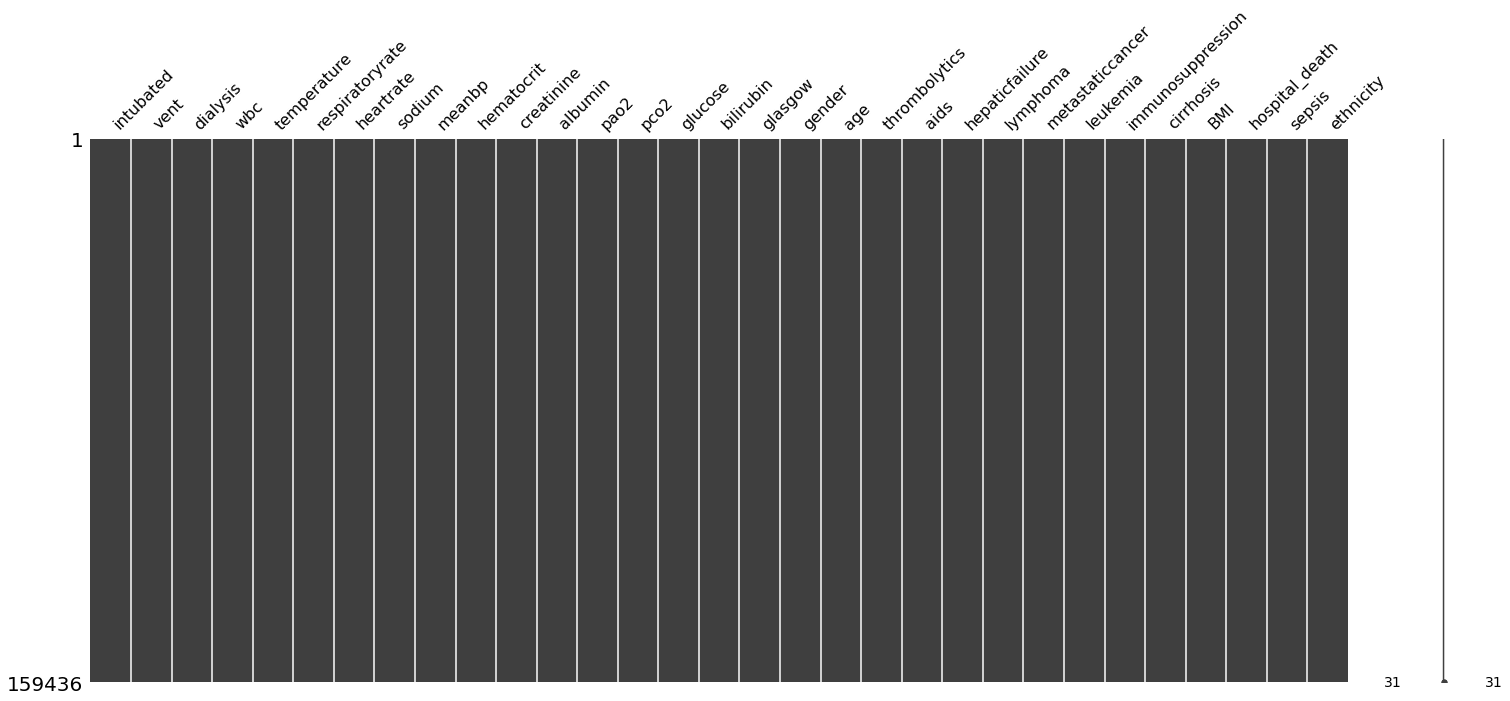

In [27]:
msno.matrix(stat_df)

In [28]:
stat_df.isnull().sum()

intubated            0
vent                 0
dialysis             0
wbc                  0
temperature          0
respiratoryrate      0
heartrate            0
sodium               0
meanbp               0
hematocrit           0
creatinine           0
albumin              0
pao2                 0
pco2                 0
glucose              0
bilirubin            0
glasgow              0
gender               0
age                  0
thrombolytics        0
aids                 0
hepaticfailure       0
lymphoma             0
metastaticcancer     0
leukemia             0
immunosuppression    0
cirrhosis            0
BMI                  0
hospital_death       0
sepsis               0
ethnicity            0
dtype: int64

In [29]:
stat_df.shape

(159436, 31)

## Rounding BMI values:

In [30]:
stat_df['BMI'].head()

0    36.295906
1    20.575852
2    22.732803
3    38.617545
4    27.421875
Name: BMI, dtype: float64

In [31]:
stat_df['BMI']=round(stat_df['BMI'],2)

In [32]:
stat_df['BMI'].head()

0    36.30
1    20.58
2    22.73
3    38.62
4    27.42
Name: BMI, dtype: float64

exporting the dataset for statistical analysis:

In [ ]:
stat_df.to_csv(r'/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/stats_&_sepsis_prediction_dataset.csv', header=True)